In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn

%matplotlib inline

# Mobius invariant signatures

We are using the four invariants:
* $J_1 = f_i f_i$
* $J_2 = f_{ii}$
* $J_3 = \frac{n \cdot \nabla(\nabla \times n)}{\| \nabla f \|^2}$
* $J_4 = \frac{n \times \nabla(\nabla \cdot n)}{\| \nabla f \|^2}$

In [68]:
def Mobsignature(F, h=1):
    """ Compute equiaffine-invariant image signature using finite differences"""
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
    Fxxx, Fxxy = np.gradient(Fxx, h)
    Fxyx, Fxyy = np.gradient(Fxy, h)
    Fyyx, Fyyy = np.gradient(Fyy, h)
    normaliser = np.sqrt(Fx*Fx + Fy*Fy)
    
    # Compute n
    n = np.array([Fx/normaliser,Fy/normaliser])
    
    J1 = Fx*Fx + Fy*Fy 
    J2 = Fxx + Fyy
    J3 = (-Fx*Fxxy + Fx*Fxyy - Fy*Fxyy + Fy*Fyyy)/(normaliser**2)
    J4 = (Fx*Fxxy + Fx*Fyyy - Fxxx*Fy - Fy*Fxyy)/(normaliser**2)

    return (J1, J2, J3, J4)


## Test image
We use as our test function the function `f(x, y)` defined below

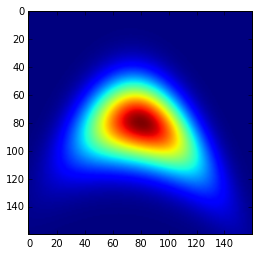

In [51]:
def f(x, y):
    return np.exp(-4*x**2 -8*(y-0.2*x - 0.8*x**2)**2)

h = 1./80
X, Y = np.meshgrid(np.arange(-1, 1, h), np.arange(-1, 1, h))
F0 = f(X, Y)
plt.imshow(F0)

## Transformation
We generate a transformation 


In [64]:
from numpy.random import rand, randn

a = np.complex(0.9,0.1)
b = 0.1
c = np.complex(.1,0.4)
d = 1


The image and its transformation are plotted below


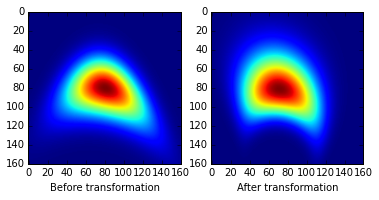

In [65]:
phi = (a*(X+Y*1j) + b)/(c*(X+Y*1j)+d)
#print np.real(phi)

F1 = f(np.real(phi),np.imag(phi))

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(F0)
axarr[0].set_xlabel('Before transformation')
axarr[1].imshow(F1)
axarr[1].set_xlabel('After transformation')

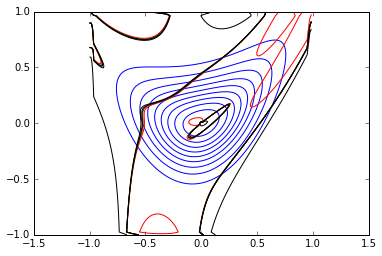

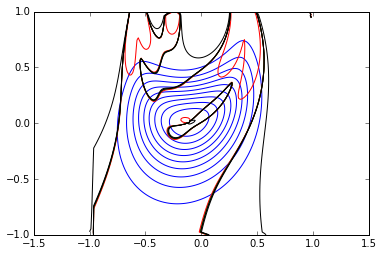

In [69]:
contour_levels = [0.25, 0.5, 0.75, 1]
plt.figure()
h=0.01
sig0 = Mobsignature(F0, h)
sig1 = Mobsignature(F1, h)

pl.figure()
plt.contour(X,Y,F0,levels=np.linspace(.1,.9,9),colors='blue')
plt.contour(X,Y, sig0[2], levels=[-100,-1,-0.25,0,0.25,1,100],colors=('red','red','red','green','black','black','black'))
plt.axis('equal')

pl.figure()
plt.contour(X,Y,F1,levels=np.linspace(.1,.9,9),colors='blue')
plt.contour(X,Y, sig1[2], levels=[-100,-1,-0.25,0,0.25,1,100],colors=('red','red','red','green','black','black','black'))
plt.axis('equal')

## Compare signatures of the two images
We compare the signatures for a few contours (with respect to the function value)


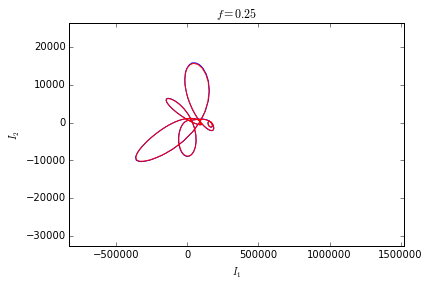

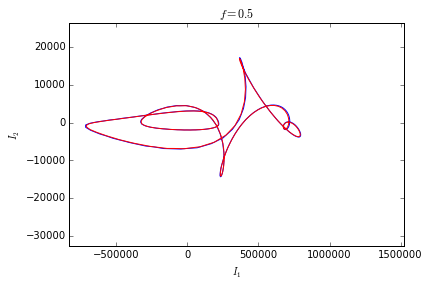

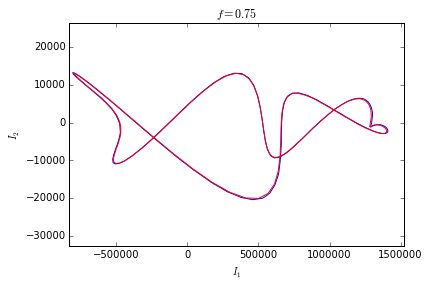

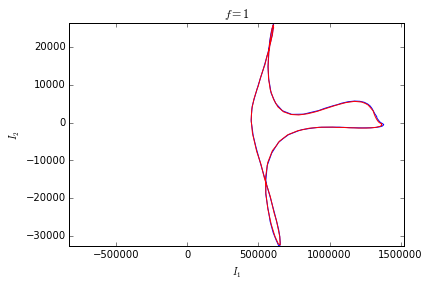

In [14]:
sig0 = SA2transvectants(F0, h)
sig1 = SA2transvectants(F1, h)
contour_levels = [0.25, 0.5, 0.75, 1]

i0 = 3
i1 = 4

for level in contour_levels:
    plt.figure()
    plt.contour(sig0[i0], sig0[i1], sig0[0], levels=[level], colors='blue')
    plt.contour(sig1[i0], sig1[i1], sig1[0], levels=[level], colors='red')
    plt.xlabel('$I_1$')
    plt.ylabel('$I_2$')
    plt.title('$f = {}$'.format(level))
